defining a convolution neural network with three convolution layer with relu activation function and two max pooling following it

In [1]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

the feature map from the final convolution layer is converted into a linear vector using faltten layer. as we have 20 ppl the output size is 20 neuron and softmax activation function is used as it is a multi class classification.

In [2]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

summary of the cnn model is displayed.

In [3]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

as its an multi class classification, the  categorical_crossentropy is used as an loss function.to balance the step size rmsprop is used as an loss function.

In [4]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

data set is accessed from googlr drive

In [5]:
#Accessing dataset from google drive
from google.colab import drive 
drive.mount('/mntDrive')
dataPath='/mntDrive/My Drive/cas_peal/'
train_dir = dataPath+'train'
val_dir = dataPath+'test'

Mounted at /mntDrive


using imagedatagenerator the images are rescaled and resized. class mode is choosen as categorical as it is an multi class classification.

In [6]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                # This is the target directory
                train_dir,
                # All images will be resized to 150x150
                target_size=(150, 150),
                batch_size=20,
              class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
                val_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='categorical')

Found 639 images belonging to 20 classes.
Found 60 images belonging to 20 classes.


the batch size is choosen as 20 and the data and lable batch size is printed

In [7]:
for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 20)


the model is finally trained with 5 epochs

In [8]:
history = model.fit_generator(
train_generator,
epochs=5,
validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
32/32 [==============================] - 323s 10s/step - loss: 2.9922 - acc: 0.0939 - val_loss: 2.9034 - val_acc: 0.2000
Epoch 2/5
32/32 [==============================] - 25s 781ms/step - loss: 2.8332 - acc: 0.2097 - val_loss: 2.5785 - val_acc: 0.4667
Epoch 3/5
32/32 [==============================] - 25s 794ms/step - loss: 2.4736 - acc: 0.3412 - val_loss: 2.0621 - val_acc: 0.5833
Epoch 4/5
32/32 [==============================] - 25s 783ms/step - loss: 1.9716 - acc: 0.4992 - val_loss: 1.4897 - val_acc: 0.5667
Epoch 5/5
32/32 [==============================] - 25s 793ms/step - loss: 1.4457 - acc: 0.6025 - val_loss: 0.9533 - val_acc: 0.8000


the trained model is saved

In [9]:
model.save('faces_20_ppl.h5')

as the metrics was choose as accuracy, using matpoltlib the accuracy for training and validation data is plotted

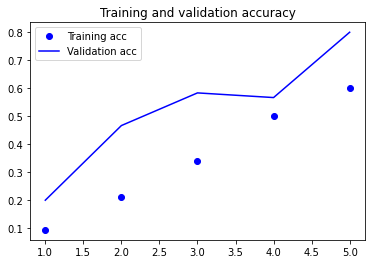

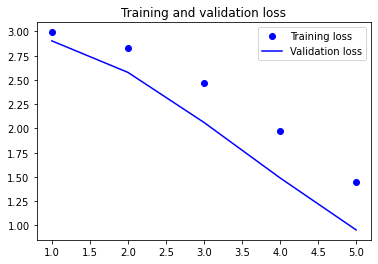

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

as the model is trained, the model is checked by using the test data. test data is first accessed from google drive and resized and rescaled as per the train and valid data. the number of images in the test data are also printed.

In [11]:
import numpy as np
final_test_dir=dataPath + 'final_test'

final_test_datagen = ImageDataGenerator(rescale=1./255)
final_test_datagenerator = final_test_datagen.flow_from_directory(
                # This is the target directory
                final_test_dir,
                # All images will be resized to 150x150
                target_size=(150, 150),
                batch_size=20,
              class_mode='categorical')
filenames = final_test_datagenerator.filenames
nb_samples = len(filenames)
print(nb_samples)
predict = model.predict_generator(final_test_datagenerator,steps = 
                                   np.ceil(nb_samples/1))

Found 2 images belonging to 2 classes.
2
Instructions for updating:
Please use Model.predict, which supports generators.


In [12]:
predict

array([[5.21610118e-02, 1.84615646e-02, 6.97612539e-02, 2.15938594e-02,
        1.06336735e-01, 5.13710417e-02, 8.03046301e-03, 7.53512457e-02,
        4.04470004e-02, 3.04880589e-02, 3.17366272e-02, 4.07024613e-03,
        1.85843557e-02, 3.80114429e-02, 9.64187309e-02, 1.85042605e-01,
        1.11607127e-02, 3.48666534e-02, 4.45030890e-02, 6.16033264e-02],
       [5.17333984e-01, 3.13692726e-03, 1.36307497e-02, 2.76549738e-02,
        8.15539341e-03, 6.65302668e-03, 1.87210552e-03, 9.80530586e-03,
        5.97268250e-03, 4.23278240e-03, 9.40203201e-03, 1.79547386e-03,
        5.54666156e-04, 2.79381231e-04, 7.98300840e-03, 2.94568062e-01,
        1.33393398e-02, 2.80346312e-02, 5.90559887e-03, 3.96899469e-02]],
      dtype=float32)

In [14]:
import numpy as np
test_1_dir=dataPath + 'test_1'
test_1_datagen = ImageDataGenerator(rescale=1./255)
test_1_datagenerator = test_1_datagen.flow_from_directory(
                # This is the target directory
                test_1_dir,
                # All images will be resized to 150x150
                target_size=(150, 150),
                batch_size=20,
              class_mode='categorical')
filenames = final_test_datagenerator.filenames
nb_samples = len(filenames)
print(nb_samples)
predict = model.predict_generator(test_1_datagenerator,steps = 
                                   np.ceil(nb_samples/1))

Found 3 images belonging to 3 classes.
2


In [15]:
predict


array([[2.08233874e-02, 2.64253980e-03, 3.72217968e-02, 2.06572190e-03,
        2.19132006e-03, 1.08374611e-01, 3.51099065e-04, 9.23713017e-03,
        2.31559396e-01, 3.14898044e-02, 3.01302224e-03, 4.20001009e-03,
        6.43231208e-04, 1.30110624e-04, 5.85032580e-03, 1.56414043e-02,
        4.03554708e-01, 1.01664877e-02, 5.76701835e-02, 5.31737655e-02],
       [1.89105514e-02, 3.75333615e-03, 6.21560365e-02, 2.84367125e-03,
        6.48662494e-03, 1.41883850e-01, 1.53710914e-03, 3.92566510e-02,
        1.46422982e-01, 9.13299620e-02, 6.00733981e-03, 1.29672997e-02,
        5.37727773e-03, 1.45666290e-03, 2.82059778e-02, 4.05682921e-02,
        1.57849282e-01, 3.17473151e-02, 1.38645172e-01, 6.25945479e-02],
       [1.23679554e-02, 9.81288124e-03, 6.53038248e-02, 5.02760988e-03,
        8.43874831e-03, 1.35993838e-01, 7.74469285e-04, 5.59199229e-02,
        6.86405301e-02, 1.99191689e-01, 5.46512194e-03, 3.77819501e-02,
        1.41937716e-03, 8.93648947e-04, 5.31014986e-03, 1.3897